In [42]:
import numpy as np
import pandas as pd
import humap
import time

import matplotlib.pyplot as plt
import math
import os

from sklearn.preprocessing import normalize
from sklearn.datasets import fetch_openml

In [43]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = normalize(X)


print(X.shape, y.shape)

(70000, 784) (70000,)


In [44]:
hUmap = humap.HUMAP(np.array([0.2, 0.2]), n_neighbors=50)
hUmap.fit(X, y)

In [45]:
X_2 = X[hUmap.original_indices(2), :]
X_1 = X[hUmap.original_indices(1), :]


# Using 'transform' method to project a hierarchy level

In [46]:
"""
    Projecting the top-level (2)
"""
embedding_2 = hUmap.transform(2)
y_2 = hUmap.labels(2)

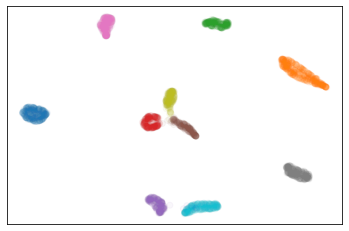

In [97]:
plt.scatter(embedding_2[:, 0], embedding_2[:, 1], c=y_2, alpha=0.05, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
plt.savefig('../images/mnist_top.png', bbox_inches='tight')
plt.show()

In [48]:
embedding_1 = hUmap.transform(1)
y_1 = hUmap.labels(1)
embedding_1.shape

(14000, 2)

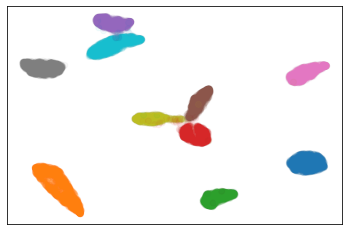

In [84]:
plt.scatter(embedding_1[:, 0], embedding_1[:, 1], c=y_1, alpha=0.05, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
plt.show()

In [50]:
embedding_0 = hUmap.transform(0)
y_0 = y
embedding_0.shape

(70000, 2)

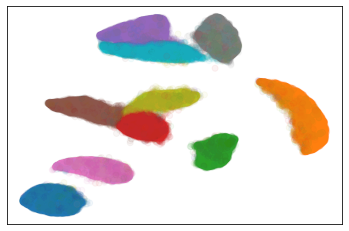

In [85]:
plt.scatter(embedding_0[:, 0], embedding_0[:, 1], c=y_0.astype(int), alpha=0.05, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
plt.show()

# Using 'transform' method to project a subset of indices

I will use a clustering to discover indices more easily

In [99]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0).fit(embedding_2)
kmeans.labels_


array([5, 2, 3, ..., 3, 3, 0], dtype=int32)

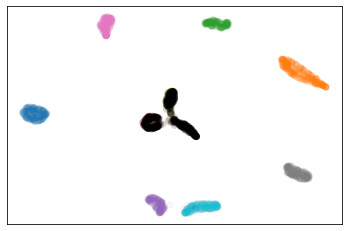

In [100]:
plt.scatter(embedding_2[:, 0], embedding_2[:, 1], c=y_2, alpha=0.05, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 

indices_black = np.arange(embedding_2.shape[0])[kmeans.labels_ == 3]

plt.scatter(embedding_2[indices_black, 0], embedding_2[indices_black, 1], c='black', alpha=0.1)

plt.savefig("../images/selection1.png", bbox_inches='tight')

In [101]:
"""
    Use transform method, however, make sure to specify indices=
"""

embedding_cluster1, y_cluster1, indices_cluster1 = hUmap.transform(2, indices=indices_black)
X_cluster1 = X_1[indices_cluster1]



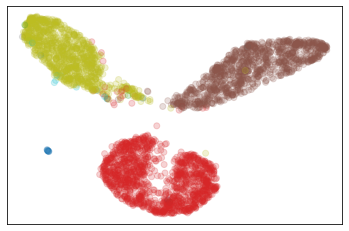

In [102]:
plt.scatter(embedding_cluster1[:, 0], embedding_cluster1[:, 1], c=y_cluster1, alpha=0.2, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
plt.savefig("../images/selection2.png", bbox_inches='tight')
plt.show()

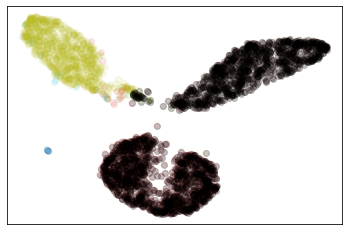

In [111]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(embedding_cluster1)
plt.scatter(embedding_cluster1[:, 0], embedding_cluster1[:, 1], c=y_cluster1, alpha=0.1, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 

indices_black = np.arange(embedding_cluster1.shape[0])[kmeans.labels_ == 1]

plt.scatter(embedding_cluster1[indices_black, 0], embedding_cluster1[indices_black, 1], c='black', alpha=0.2)
plt.savefig("../images/selection3.png", bbox_inches='tight')

In [112]:
"""
    Do the same as in the previous example
    
    Here (and for possibly subsequent levels), we have to indices = indices_clusterLevel[indices_black]
    
"""
embedding_cluster2, y_cluster2, indices_cluster2 = hUmap.transform(1, indices=indices_cluster1[indices_black])
X_cluster2 = X[indices_cluster2]



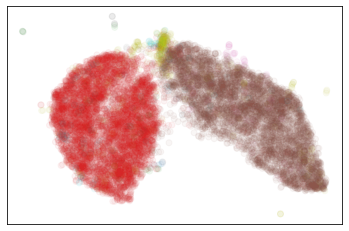

In [114]:
plt.scatter(embedding_cluster2[:, 0], embedding_cluster2[:, 1], c=y_cluster2, alpha=0.05, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
plt.savefig("../images/selection4.png", bbox_inches='tight')

# Using 'transform' method for projecting based on class

In [73]:
"""
    Make sure to set indices=, and class_based=True
"""

embedding_cluster, y_cluster, indices_cluster = hUmap.transform(2, indices=np.array([4, 9]), class_based=True)
X_cluster = X_1[indices_cluster]

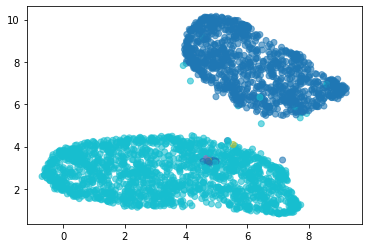

In [74]:
plt.scatter(embedding_cluster[:, 0], embedding_cluster[:, 1], c=y_cluster, alpha=0.6, cmap='tab10')
plt.show()


In [75]:
embedding_cluster0, y_cluster0, indices_cluster0 = hUmap.transform(1, indices=np.array([4, 9]), class_based=True)
X_cluster0 = X[indices_cluster0]
yy = y[indices_cluster0]

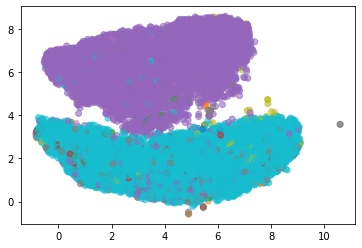

In [76]:
plt.scatter(embedding_cluster0[:, 0], embedding_cluster0[:, 1], c=yy, alpha=0.6, cmap='tab10')
plt.show()